In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings

#warnings.filterwarnings('ignore')

## Number of publications

In this part, we analyse the publications that are included in the LifeWatch special collections.

In [2]:
#publication_info = execute_to_df("1_publication.sparql")
#publication_info

#work around long sparql execution time in jupyter env
file_path = "/data/query_results/1_publication_sparql.csv"
publication_info = pd.read_csv(file_path)
publication_info

,publication,doctype,litstyle,publish_date,special_collection
0,http://dev.marineinfo.org/id/publication/351092,Ephemera,NaN,2022-01-01,NaN
1,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/919
2,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/941
3,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/915
4,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/947
...,...,...,...,...,...
53118,https://marineinfo.org/id/publication/363430,Journal article,NaN,2023-01-01,https://marineinfo.org/id/collection/507
53119,https://marineinfo.org/id/publication/363430,Journal article,NaN,2023-01-01,https://marineinfo.org/id/collection/39
53120,https://marineinfo.org/id/publication/391955,Journal article,NaN,2024-01-01,https://marineinfo.org/id/collection/941
53121,https://marineinfo.org/id/publication/391955,Journal article,NaN,2024-01-01,https://marineinfo.org/id/collection/793


In [3]:
publications = publication_info.groupby('publication').nunique()

In [4]:
print(f'There are {publications.shape[0]} publications in the LifeWatch special collections.')
publications

There are 10603 publications in the LifeWatch special collections.


,doctype,litstyle,publish_date,special_collection
publication,,,,
http://dev.marineinfo.org/id/publication/351092,1,0,1,0
https://marineinfo.org/id/publication/100077,1,0,1,5
https://marineinfo.org/id/publication/100293,1,0,1,13
https://marineinfo.org/id/publication/100295,1,0,1,8
https://marineinfo.org/id/publication/100297,1,0,1,11
...,...,...,...,...
https://marineinfo.org/id/publication/98292,1,0,1,6
https://marineinfo.org/id/publication/99798,1,1,1,5
https://marineinfo.org/id/publication/99962,1,1,1,10


#### Number of publications within defined tempo

In [5]:
# set date range
START_YEAR = 2012
END_YEAR = 2024

In [6]:
# manipulate date datatype
publication_info['publish_date'] = pd.to_datetime(publication_info['publish_date'])
publication_info['publish_year'] = publication_info['publish_date'].dt.year

In [7]:
# assess publications with missing publish_date
pubs_with_missing_publish_year = len(publication_info[publication_info['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

number of publications with missing publish date: 289


In [8]:
# replace all NaN values with zeros & convert from float to int
publication_info['publish_year'] = publication_info['publish_year'].fillna(0).astype(int)

In [9]:
# select date range
publication_info_12_24 = publication_info[ (publication_info['publish_year'] >= START_YEAR) & (publication_info['publish_year'] <= END_YEAR) ]
publication_info_12_24

,publication,doctype,litstyle,publish_date,special_collection,publish_year
0,http://dev.marineinfo.org/id/publication/351092,Ephemera,NaN,2022-01-01,NaN,2022
1,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/919,2016
2,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/941,2016
3,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/915,2016
4,https://marineinfo.org/id/publication/282187,Data paper,NaN,2016-01-01,https://marineinfo.org/id/collection/947,2016
...,...,...,...,...,...,...
53118,https://marineinfo.org/id/publication/363430,Journal article,NaN,2023-01-01,https://marineinfo.org/id/collection/507,2023
53119,https://marineinfo.org/id/publication/363430,Journal article,NaN,2023-01-01,https://marineinfo.org/id/collection/39,2023
53120,https://marineinfo.org/id/publication/391955,Journal article,NaN,2024-01-01,https://marineinfo.org/id/collection/941,2024
53121,https://marineinfo.org/id/publication/391955,Journal article,NaN,2024-01-01,https://marineinfo.org/id/collection/793,2024


In [10]:
publications_12_24 = publication_info_12_24.groupby('publication').nunique()
print(f'There are {publications_12_24.shape[0]} publications withing the defined time range.')

There are 9630 publications withing the defined time range.


In [11]:
# calculate number & cummulative number of publications per publish year 
pubs_per_publishyear = publication_info_12_24.groupby('publish_year').nunique()
pubs_per_publishyear['publication_cumsum'] = pubs_per_publishyear['publication'].cumsum(skipna=False)

In [12]:
# Table
pubs_per_publishyear.rename(columns={
    'publication': 'Number of publications', 
    'publication_cumsum': 'Cummulative number of publications'}, inplace=True)

pubs_per_publishyear.transpose()

publish_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Number of publications,223,332,371,372,326,442,890,1038,1288,1360,1243,1432,313
doctype,6,6,6,6,7,7,7,7,7,7,6,6,4
litstyle,5,8,6,5,7,7,6,4,7,10,9,10,1
publish_date,1,1,1,1,1,1,1,1,1,1,1,1,1
special_collection,43,54,52,63,56,50,59,50,62,51,45,50,25
Cummulative number of publications,223,555,926,1298,1624,2066,2956,3994,5282,6642,7885,9317,9630


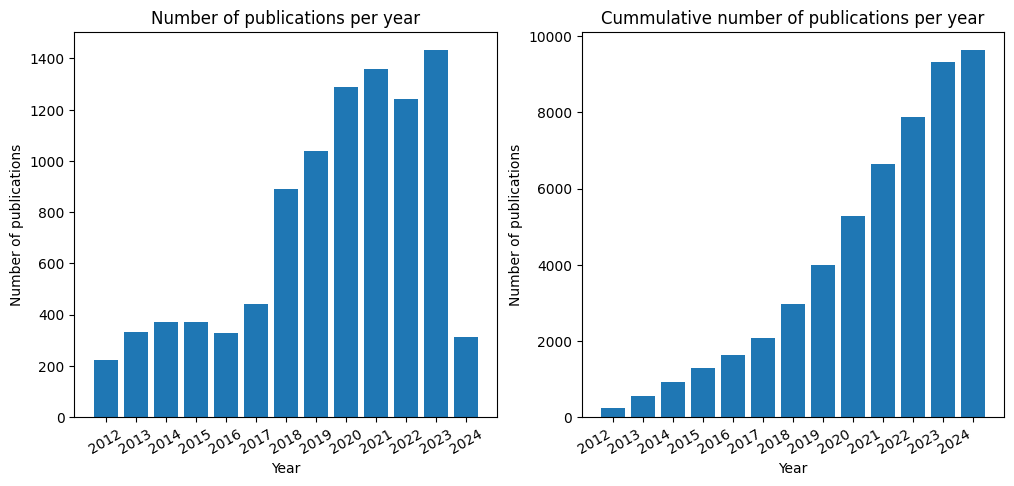

In [13]:
warnings.filterwarnings('ignore')
# Horizontal barplot of number of publiations per publish year
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Number of publications'])
ax[0].set_title('Number of publications per year')
ax[0].set_ylabel('Number of publications')
ax[0].set_xlabel('Year')
ax[0].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30)

ax[1].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Cummulative number of publications'])
ax[1].set_title('Cummulative number of publications per year')
ax[1].set_ylabel('Number of publications')
ax[1].set_xlabel('Year')
ax[1].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30, ha='right')

plt.show()

#### Types of publications

In [20]:
pub_types = publication_info_12_24.groupby(['doctype', 'litstyle']).nunique()[['publication']].rename(columns={'publication':'count'})

# Table
pub_types

count
doctype         litstyle                
Book chapters   Conference paper      54
                Summary              141
Book/Monograph  Advice text            4
                Conference             9
                Dissertation         585
                Final report           1
                Preprint               1
                Press                  1
                Summary                2
Ephemera        Poster                15
                Presentation           3
                Press                 10
Journal article Conference paper       7
                Corrigendum            5
                Preprint              27
                Summary               18
Reports         Advice text            1
                Annual report          5
                Final report          18
                Project report         5
                Scientific report      1

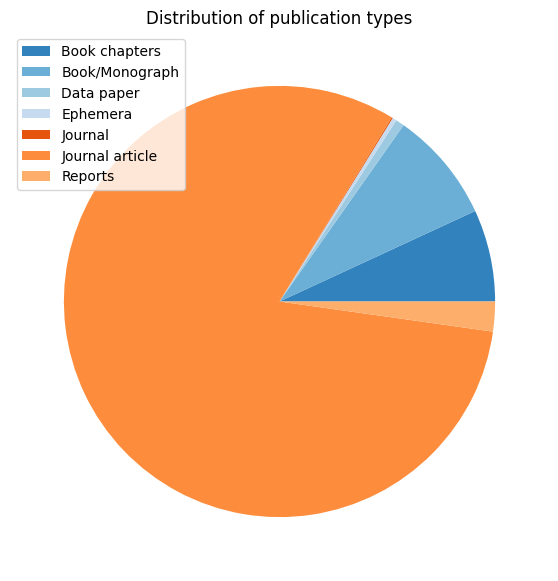

In [23]:
pub_types_ = publication_info_12_24.groupby(['doctype']).nunique()[['publication']].rename(columns={'publication':'count'})
# Graph
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(10))
pie_qh_user = pub_types_.plot(kind='pie', y='count', figsize=(7, 7), colors=colors, legend=True, labels=None)

pie_qh_user.set_title("Distribution of publication types")
pie_qh_user.set_ylabel('')
pie_qh_user.set_xlabel('')
plt.show()

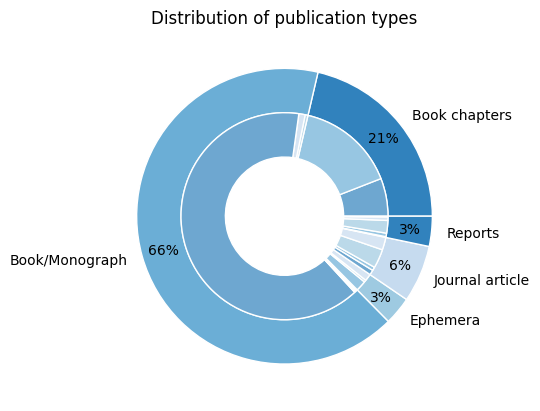

In [33]:
# Graph
df = pub_types.copy().reset_index()
df_doctype = df.groupby('doctype', sort=False)['count'].sum()
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4))
#inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
inner_colors = outer_colors.copy()
inner_colors[:, -1] *= 0.7

ax.pie(df_doctype, labels=df_doctype.index , radius=1, colors=outer_colors, autopct='%1.0f%%', pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['count'], radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribution of publication types')
plt.show()